<div style="text-align: center;">
    <img src="logo3.jpg" alt="Descripción de la imagen" width="200" style="border-radius: 15px;"/>
</div>

# BinarySort: Algoritmo de Ordenamiento Binario
(para numeros enteros y positivos)

<p>En el ámbito de la informática y las ciencias de la computación, la eficiencia algorítmica es un aspecto crucial que determina el rendimiento de sistemas y aplicaciones. Los algoritmos de ordenación tradicionales, como Quicksort y Mergesort, han establecido un estándar en la industria, con eficiencias promedio de O(n log n). Sin embargo, con el crecimiento de los volúmenes de datos y la creciente demanda de procesamiento en tiempo real, surge la necesidad de explorar nuevos paradigmas que puedan reducir aún más la complejidad temporal de los algoritmos de ordenación.Este estudio está motivado por la posibilidad de desarrollar un algoritmo de ordenación que logre una eficiencia aún mayor. Se ha planteado un enfoque binario(divide y venceras) para tratar de desarrollar un algoritmo  O(n log n) mas eficiente o conseguir un O(n).</p>

## Importamos las bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Cargamos la data ya ordenada

In [2]:
filename = 'data4.csv'
df = pd.read_csv(filename)

In [3]:
df = df[df['size'] <= 12000000]

df.head()

,method,size,range,distribution,ordered,time
0,binarySort,1000000,10000,uniform,True,1.300887
1,quickSort,1000000,10000,uniform,True,1.911938
2,mergeSort,1000000,10000,uniform,True,2.980731
3,quickSort,2000000,10000,uniform,True,4.733459
4,binarySort,2000000,10000,uniform,True,3.662853


In [4]:
df["ratio"] = ((df["size"]) / df["time"])
df = df[df['method'] != 'binarySort']
df['method'] = df['method'].replace('binarySortV2', 'binarySort')
df

,method,size,range,distribution,ordered,time,ratio
1,quickSort,1000000,10000,uniform,True,1.911938,5.230294e+05
2,mergeSort,1000000,10000,uniform,True,2.980731,3.354881e+05
3,quickSort,2000000,10000,uniform,True,4.733459,4.225240e+05
5,mergeSort,2000000,10000,uniform,True,7.209374,2.774166e+05
6,quickSort,3000000,10000,uniform,True,7.787278,3.852437e+05
...,...,...,...,...,...,...,...
1435,binarySort,12000000,50000,right_skewed,True,20.931009,5.733121e+05
1436,binarySort,12000000,20000,left_skewed,True,8.744412,1.372305e+06
1437,binarySort,12000000,30000,left_skewed,True,7.794164,1.539613e+06
1438,binarySort,12000000,40000,left_skewed,True,7.748120,1.548763e+06


### Verificamos que todas las pruebas hayan sido exitosas

In [5]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")

todos se ordenaron


### Cargamos constantes necesarias y funciones

In [6]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  
    else:
        return str(int(x)) 
colors = ['#1f77b4', 'green', '#ff7f0e']
color_map = {
    'binarySort': '#1f77b4',
    'mergeSort': 'green',
    'quickSort': '#ff7f0e',
}
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']
def plot_distributions(df, dist, axisY = 'time'):
    ranges = [10000,20000,30000,40000,50000]
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))  
    axs = axs.flatten()
    
    ax_index = 0

    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset[axisY], label=method, color=color_map.get(method, 'black'), linewidth=2)

        ax.set_xlabel('Tamaño de la Lista')
        if axisY == 'time':
            ax.set_ylabel('Tiempo en segundos')
            ax.set_title(f'Rango de valores: entre 0 y {r}')
        if axisY == 'ratio':
            ax.set_ylabel('Ratio (Tamaño/Segundos)')
            ax.set_title(f'Rendimiento para un rango entre 0 y {r}')

        
        ax.legend(title='Algoritmo')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

    plt.tight_layout()
    plt.show()


# Grafica de lineas

<div style="display: flex; align-items: center;">
    <img src="normal.jpg" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">1. Distribucion Normal</h3>
</div>

#### 1.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: NORMAL

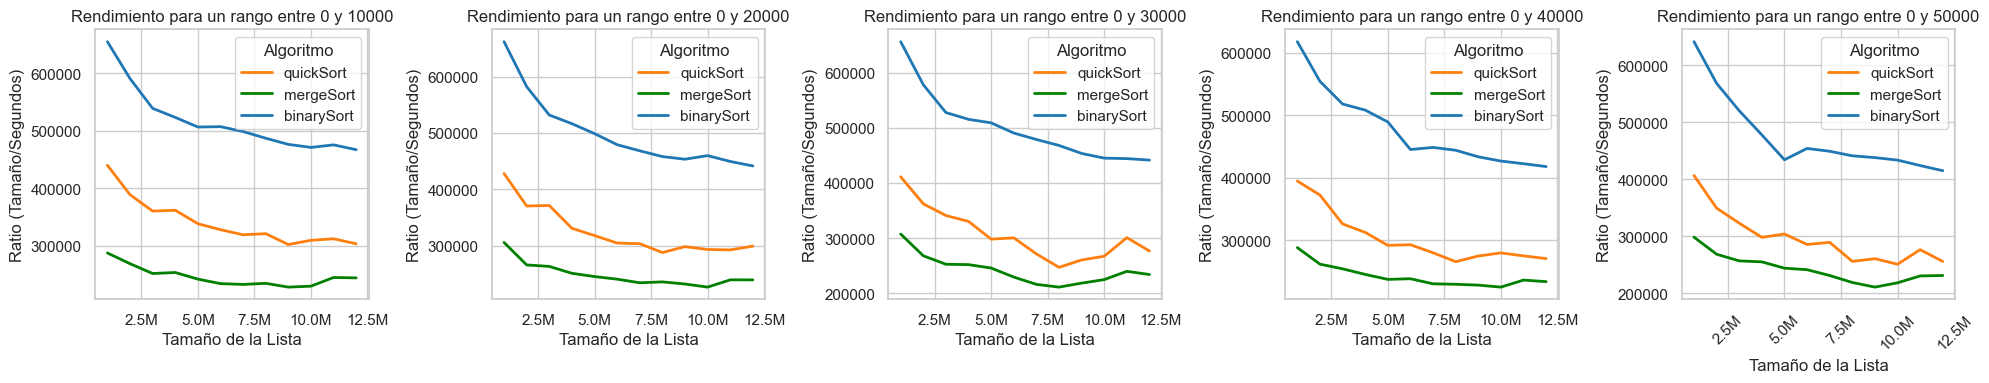

In [108]:
plot_distributions(df, 'normal', 'ratio')

#### 1.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista: NORMAL

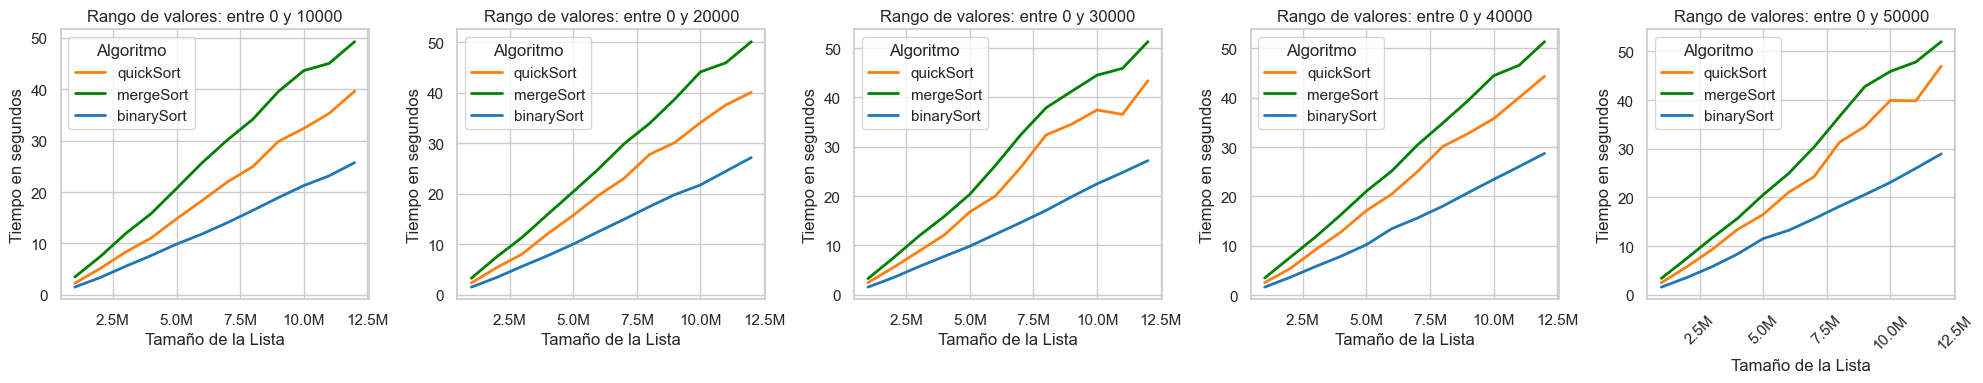

In [109]:
plot_distributions(df, 'normal')

<div style="display: flex; align-items: center;">
    <img src="uniforme.png" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">2. Distribucion Uniforme</h3>
</div>

#### 2.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: UNIFORME

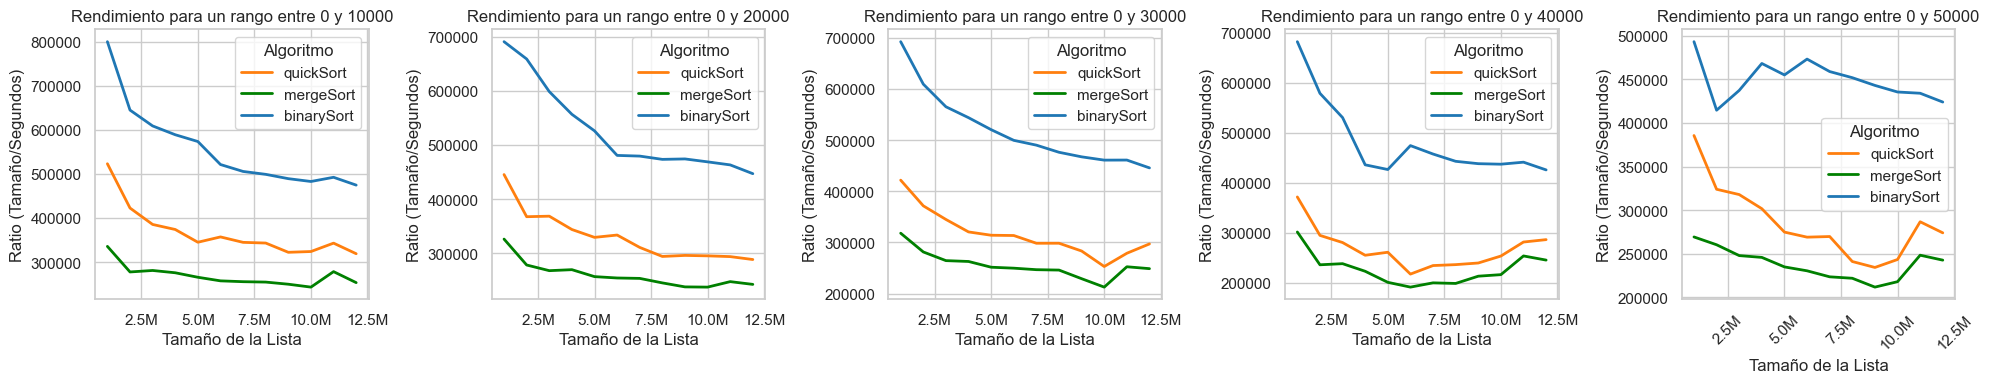

In [110]:
plot_distributions(df, 'uniform', 'ratio')

#### 2.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista - UNIFORME

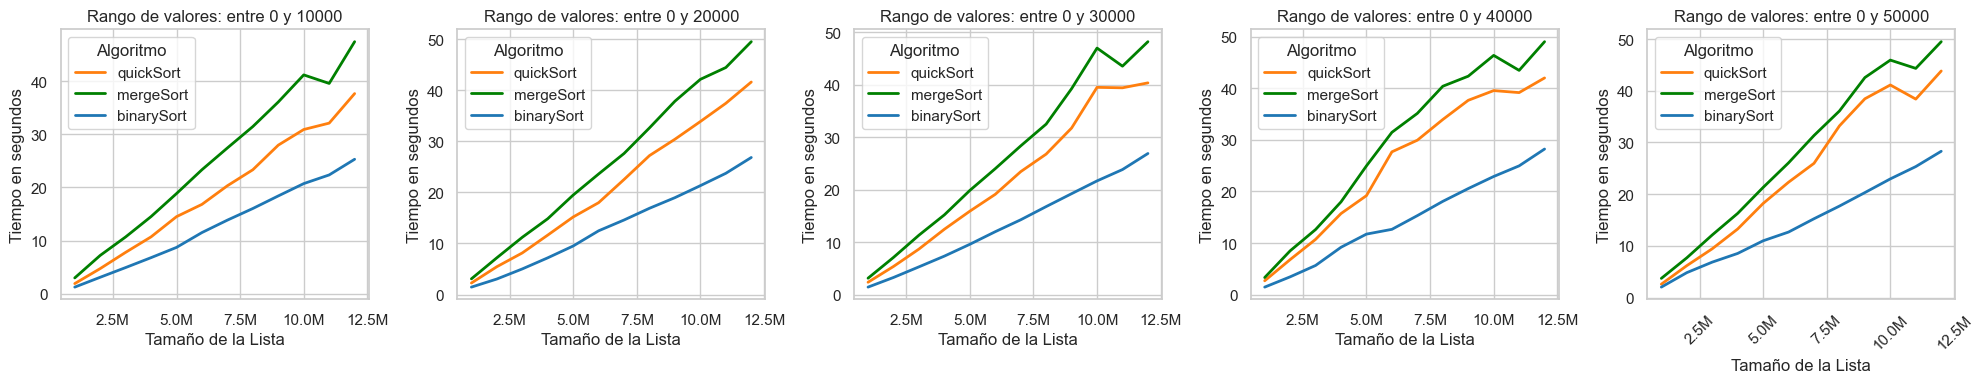

In [111]:
plot_distributions(df, 'uniform')

<div style="display: flex; align-items: center;">
    <img src="bimodal.PNG" alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">3. Distribucion Bimodal</h3>
</div>

#### 3.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: BIMODAL

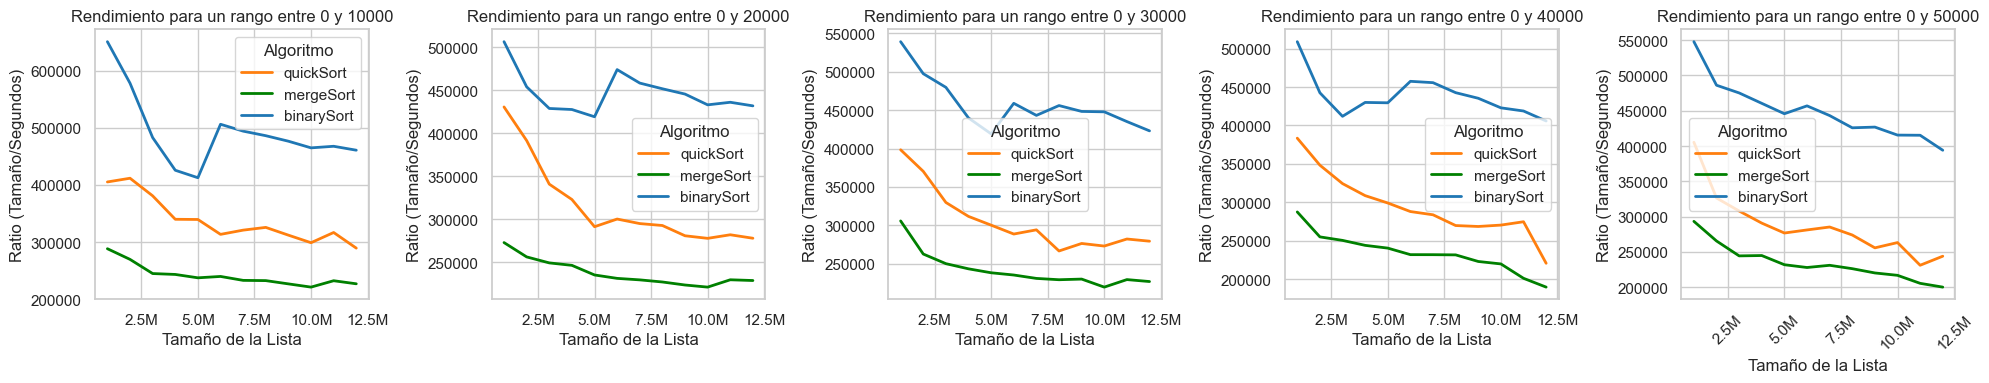

In [112]:
plot_distributions(df, 'bimodal', 'ratio')

#### 3.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista - BIMODAL

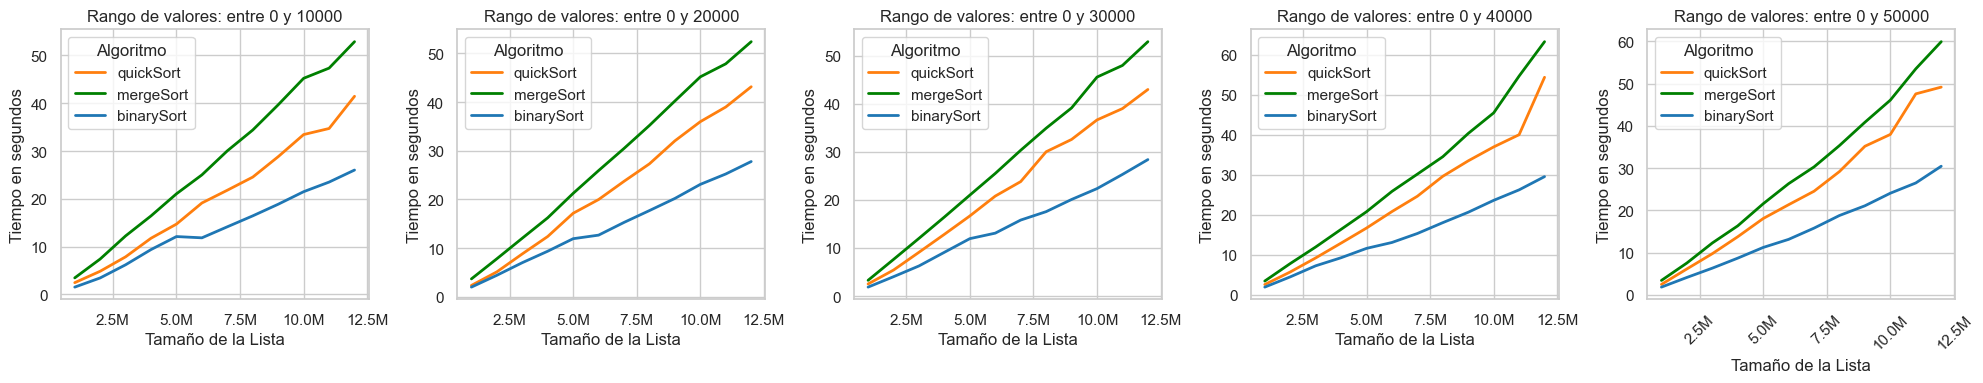

In [113]:
plot_distributions(df, 'bimodal')

<div style="display: flex; align-items: center;">
    <img src="right.png"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">4. Distribucion Sesgada a la derecha</h3>
</div>

#### 4.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: SESGADA A LA DERECHA

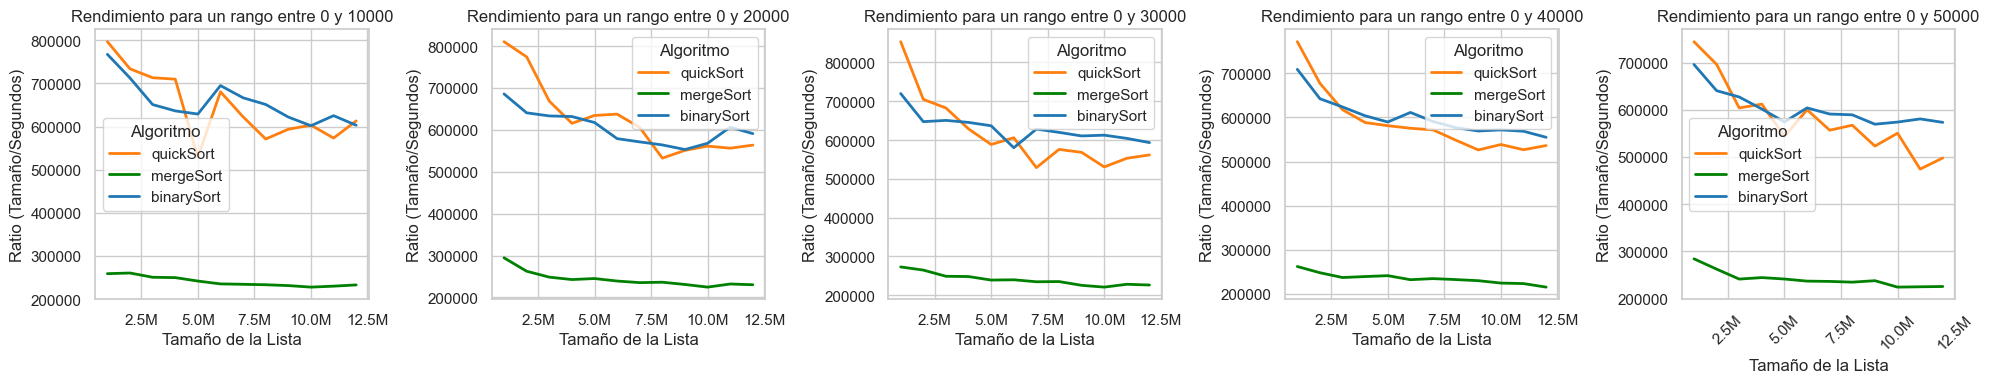

In [114]:
plot_distributions(df, 'right_skewed', 'ratio')

#### 4.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista - SESGADA A LA DERECHA

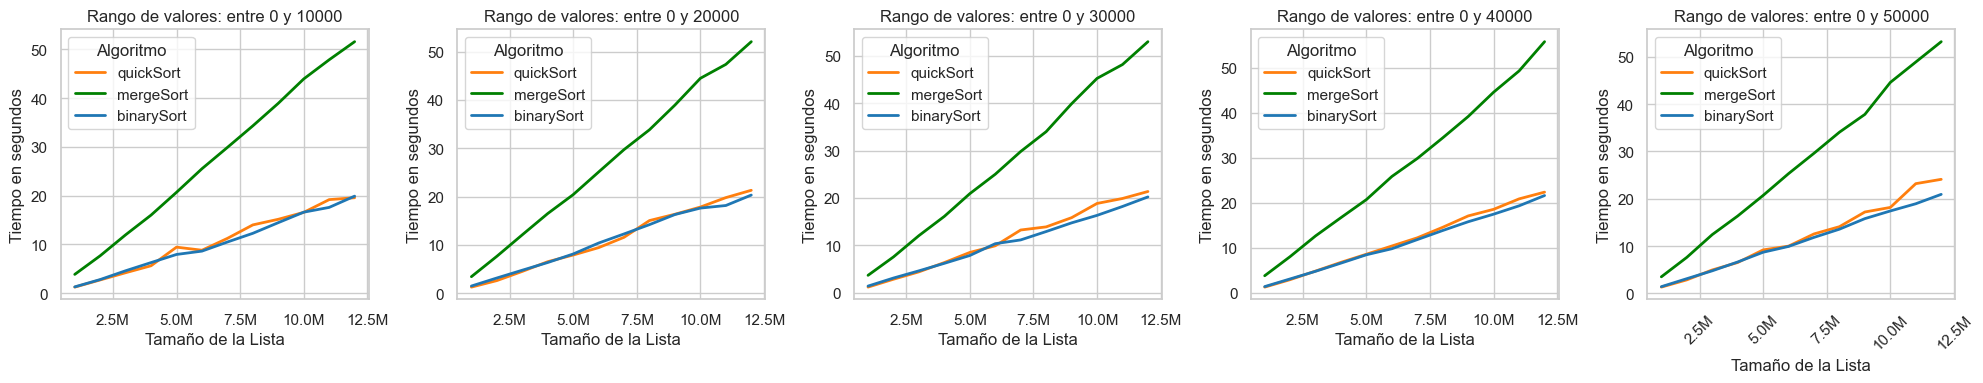

In [115]:
plot_distributions(df, 'right_skewed')

<div style="display: flex; align-items: center;">
    <img src="left.png"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">5. Distribucion Sesgada a la izquierda</h3>
</div>

#### 5.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: SESGADA A LA IZQUIERDA

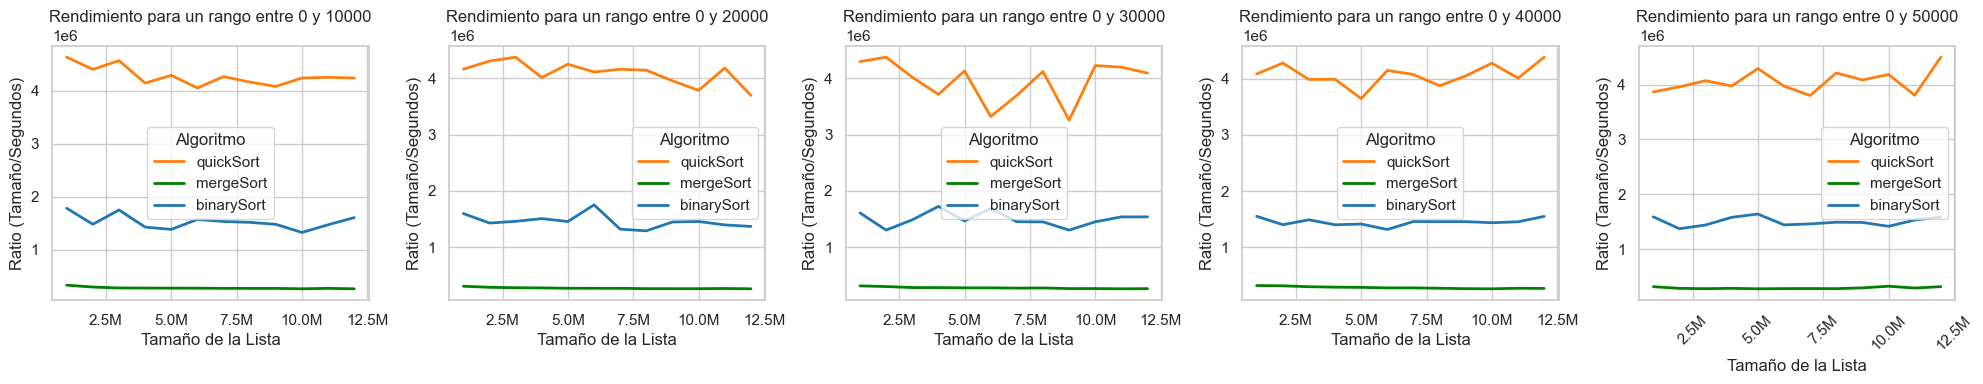

In [116]:
plot_distributions(df, 'left_skewed', 'ratio')

#### 5.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista - SESGADA A LA IZQUIERDA

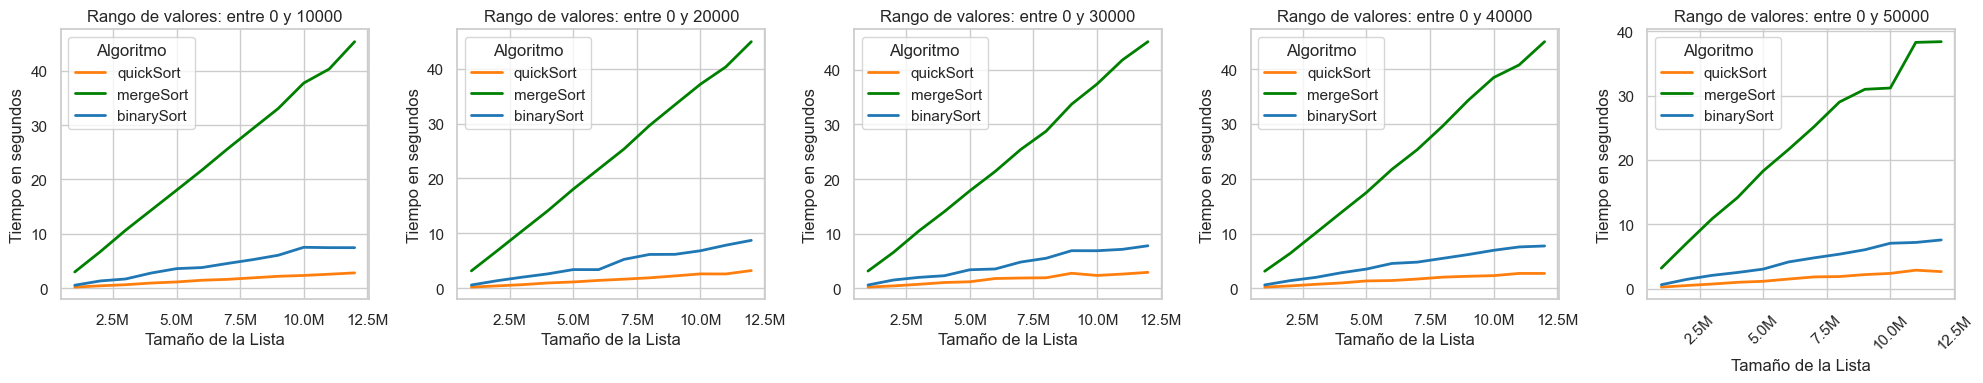

In [117]:
plot_distributions(df, 'left_skewed')

<div style="display: flex; align-items: center;">
    <img src="zeros.jpg"  alt="Descripción de la imagen" width="200" style="border-radius: 15px; margin-right: 20px;"/>
    <h3 style="font-size: 1.5em; font-weight: bold;">6. Lista de numeros con el 70% de sus valores en 0</h3>
</div>

#### 6.1. Comparación de Eficiencia de Algoritmos de Ordenamiento en Función del Tamaño de la Lista: 70% de CEROS

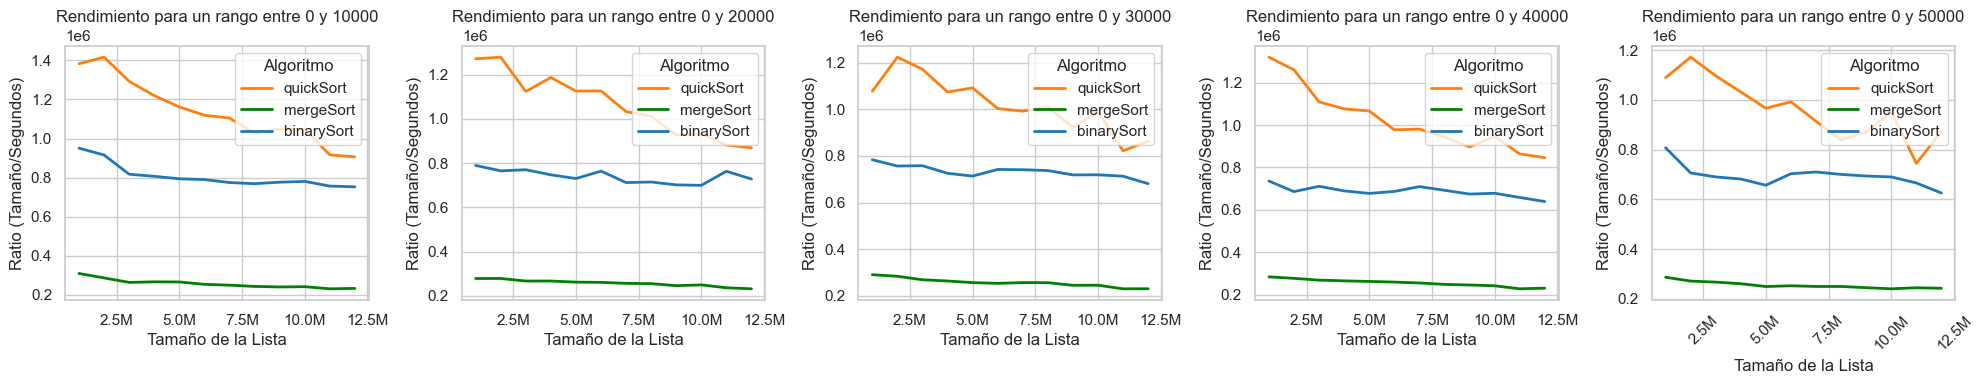

In [118]:
plot_distributions(df, 'zeros', 'ratio')

### 6.2. Análisis del Tiempo de Ejecución de Algoritmos de Ordenamiento Según el Tamaño de la Lista - 70% de CEROS

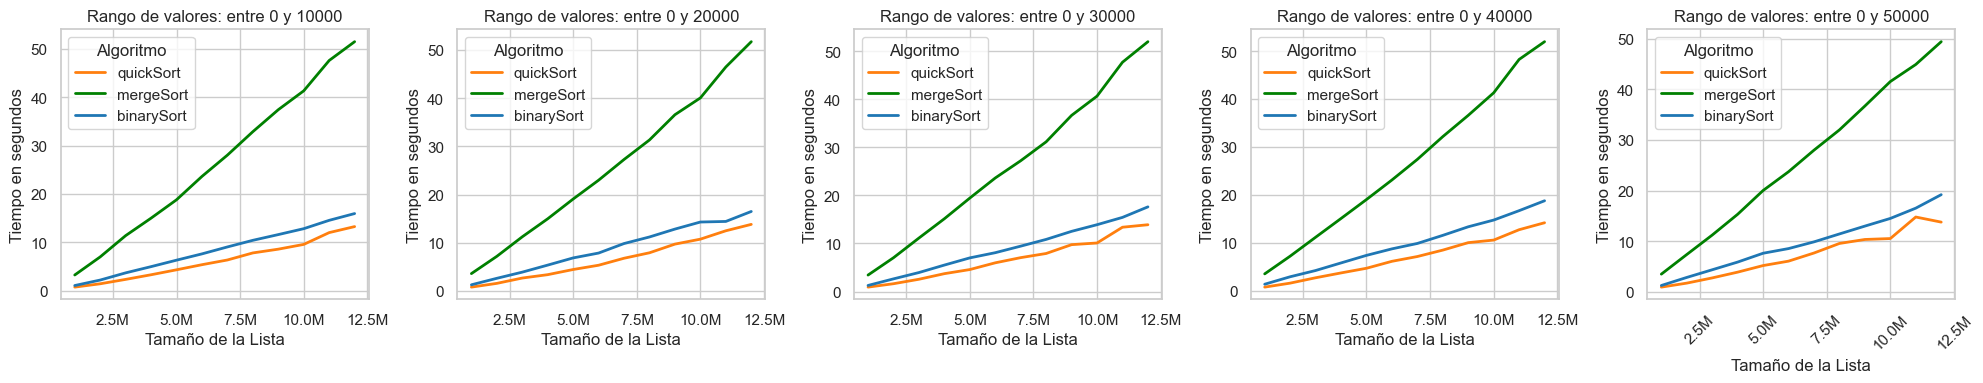

In [119]:
plot_distributions(df, 'zeros')

### BinarySort y QuickSort parecen ser los mas estables y eficientes mientras MergeSort es mas susceptible a las distribuciones con sesgos. 

# Mapa de calor

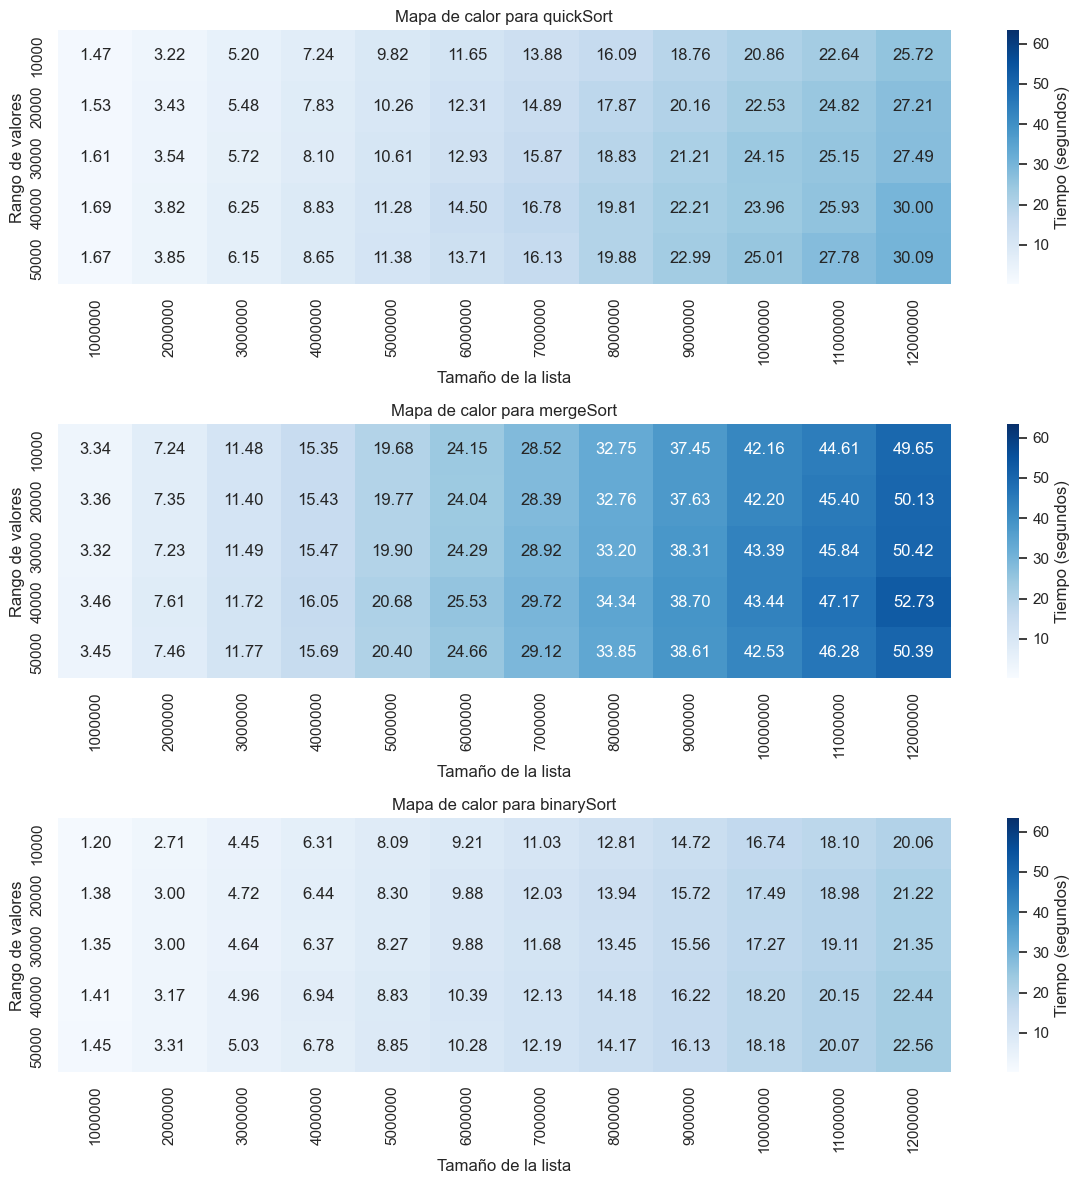

In [120]:

sns.set(style="whitegrid")


vmin = df['time'].min()
vmax = df['time'].max()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))


methods = df['method'].unique()

axes = axes.flatten()

for i, method in enumerate(methods):
    df_method = df[df['method'] == method]
    
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="Blues", vmin=vmin, vmax=vmax,  cbar_kws={'label': 'Tiempo (segundos)'} )
    axes[i].set_title(f"Mapa de calor para {method}")
    axes[i].set_xlabel("Tamaño de la lista")
    axes[i].set_ylabel("Rango de valores")

plt.tight_layout()
plt.show()


<h3>Mapa de Calor para quickSort</h3>
<p>El mapa de calor para quickSort muestra un incremento gradual en el tiempo de ejecución a medida que crece el tamaño de la lista. El aumento es particularmente notable cuando el tamaño de la lista supera los 6 millones de elementos. Esto sugiere que quickSort tiene una complejidad de tiempo que se ve más afectada a medida que la lista crece, lo que lo hace menos eficiente para listas muy grandes.</p>

<h3>Mapa de Calor para mergeSort</h3>
<p>El mapa de calor para mergeSort indica un incremento en el tiempo de ejecución, similar a quickSort, pero con un patrón más constante y estable. El tiempo de ejecución es significativamente mayor en comparación con quickSort, especialmente para listas de tamaño superior a 8 millones de elementos. Esto refuerza la idea de que mergeSort, aunque estable, no es tan eficiente en términos de tiempo como quickSort o binarySort cuando se trabaja con listas muy grandes.</p>

<h3>Mapa de Calor para binarySort</h3>
<p>El mapa de calor para binarySort muestra que este algoritmo es consistentemente más rápido que tanto quickSort como mergeSort, especialmente cuando el tamaño de la lista aumenta. Los tiempos de ejecución se incrementan de manera más suave y con valores significativamente menores que en los otros dos algoritmos. Esto indica que binarySort es mucho más eficiente en términos de tiempo de ejecución y maneja mejor el crecimiento del tamaño de la lista, lo que lo hace el algoritmo más adecuado para grandes volúmenes de datos.</p>

<h3>Conclusión General</h3>
<p>El análisis de los tres mapas de calor sugiere que, de los algoritmos comparados, <strong>binarySort</strong> es el más eficiente y escalable, presentando tiempos de ejecución menores incluso a medida que el tamaño de la lista se incrementa considerablemente. <strong>quickSort</strong> también muestra un buen rendimiento, pero empieza a ser menos eficiente que binarySort en listas más grandes. <strong>mergeSort</strong> es el algoritmo menos eficiente en esta comparación, mostrando tiempos de ejecución consistentemente más altos, especialmente en listas de mayor tamaño.<p>


# Grafico de barras

In [121]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0
for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]
            if temp.iloc[0]["time"] < temp.iloc[1]["time"] and temp.iloc[0]["time"] < temp.iloc[2]["time"]:
                method_with_min_time = temp.iloc[0]["method"]

            elif temp.iloc[1]["time"] < temp.iloc[0]["time"] and temp.iloc[1]["time"] < temp.iloc[2]["time"]:
                method_with_min_time =temp.iloc[1]["method"]

            elif temp.iloc[2]["time"] < temp.iloc[1]["time"] and temp.iloc[2]["time"] < temp.iloc[0]["time"]:
                method_with_min_time =temp.iloc[2]["method"]

            
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1

methods = [ 'binarySort', 'mergeSort', 'quickSort']
times = [binarySort, mergeSort, quickSort, ] 


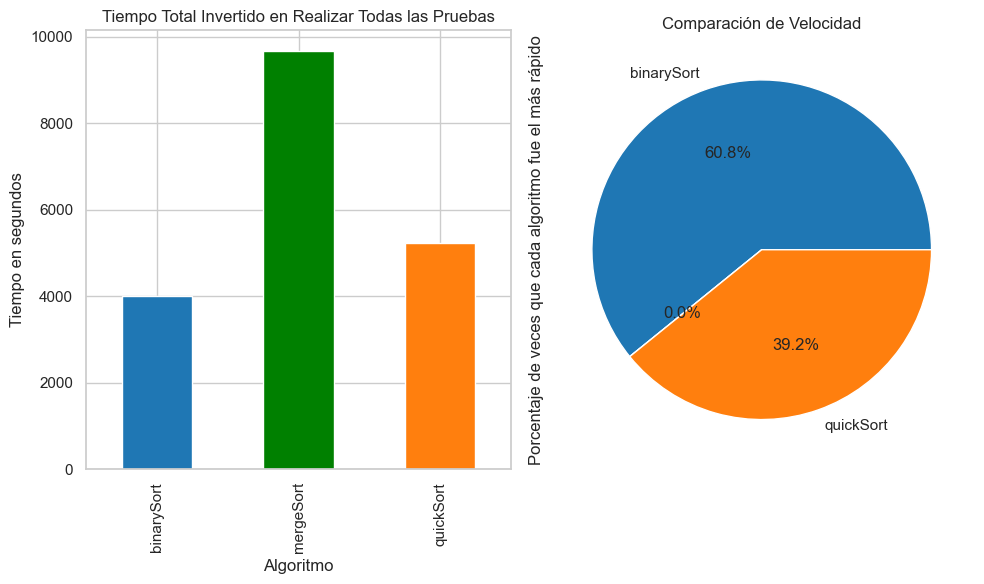

In [122]:

fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()
colors = ['#1f77b4', 'green', '#ff7f0e']


fig, axes = plt.subplots(1, 2, figsize=(10, 6))  


total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Tiempo Total Invertido en Realizar Todas las Pruebas')
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('Tiempo en segundos')


fastest_method_counts.plot.pie( ax=axes[1],autopct='%1.1f%%', colors=colors,  title='Comparación de Velocidad')
axes[1].set_ylabel('Porcentaje de veces que cada algoritmo fue el más rápido')

plt.tight_layout()

plt.show()

<h3>Gráfico de Barras: Tiempo Total Invertido en Realizar Todas las Pruebas</h3>
<p>Este gráfico muestra el tiempo total que cada algoritmo de ordenamiento tomó para realizar todas las pruebas. Podemos observar lo siguiente:</p>
<ul>
    <li><strong>binarySort</strong> es el algoritmo que menos tiempo total invirtió, con aproximadamente 4000 segundos. Esto refuerza la conclusión previa de que es el algoritmo más eficiente en términos de tiempo de ejecución.</li>
    <li><strong>mergeSort</strong> es el algoritmo más lento, con un tiempo total cercano a los 10,000 segundos, lo que lo coloca como el menos eficiente entre los tres.</li>
    <li><strong>quickSort</strong> está en una posición intermedia, con un tiempo total de aproximadamente 6000 segundos, lo que sugiere que es más rápido que mergeSort pero significativamente más lento que binarySort.</li>
</ul>

<h3>Gráfico Circular: Comparación de Velocidad</h3>
<p>Este gráfico de pastel muestra el porcentaje de veces que cada algoritmo fue el más rápido durante las pruebas:</p>
<ul>
    <li><strong>binarySort</strong> fue el más rápido en el 60.8% de las pruebas, lo que confirma su superioridad en términos de velocidad y eficiencia general.</li>
    <li><strong>quickSort</strong> fue el más rápido en el 39.2% de las pruebas. Aunque no es tan eficiente como binarySort, quickSort aún tiene un desempeño competitivo en ciertas condiciones.</li>
    <li><strong>mergeSort</strong> no aparece como el más rápido en ninguna de las pruebas (0%), lo que indica que siempre fue superado por los otros dos algoritmos en términos de velocidad.</li>
</ul>


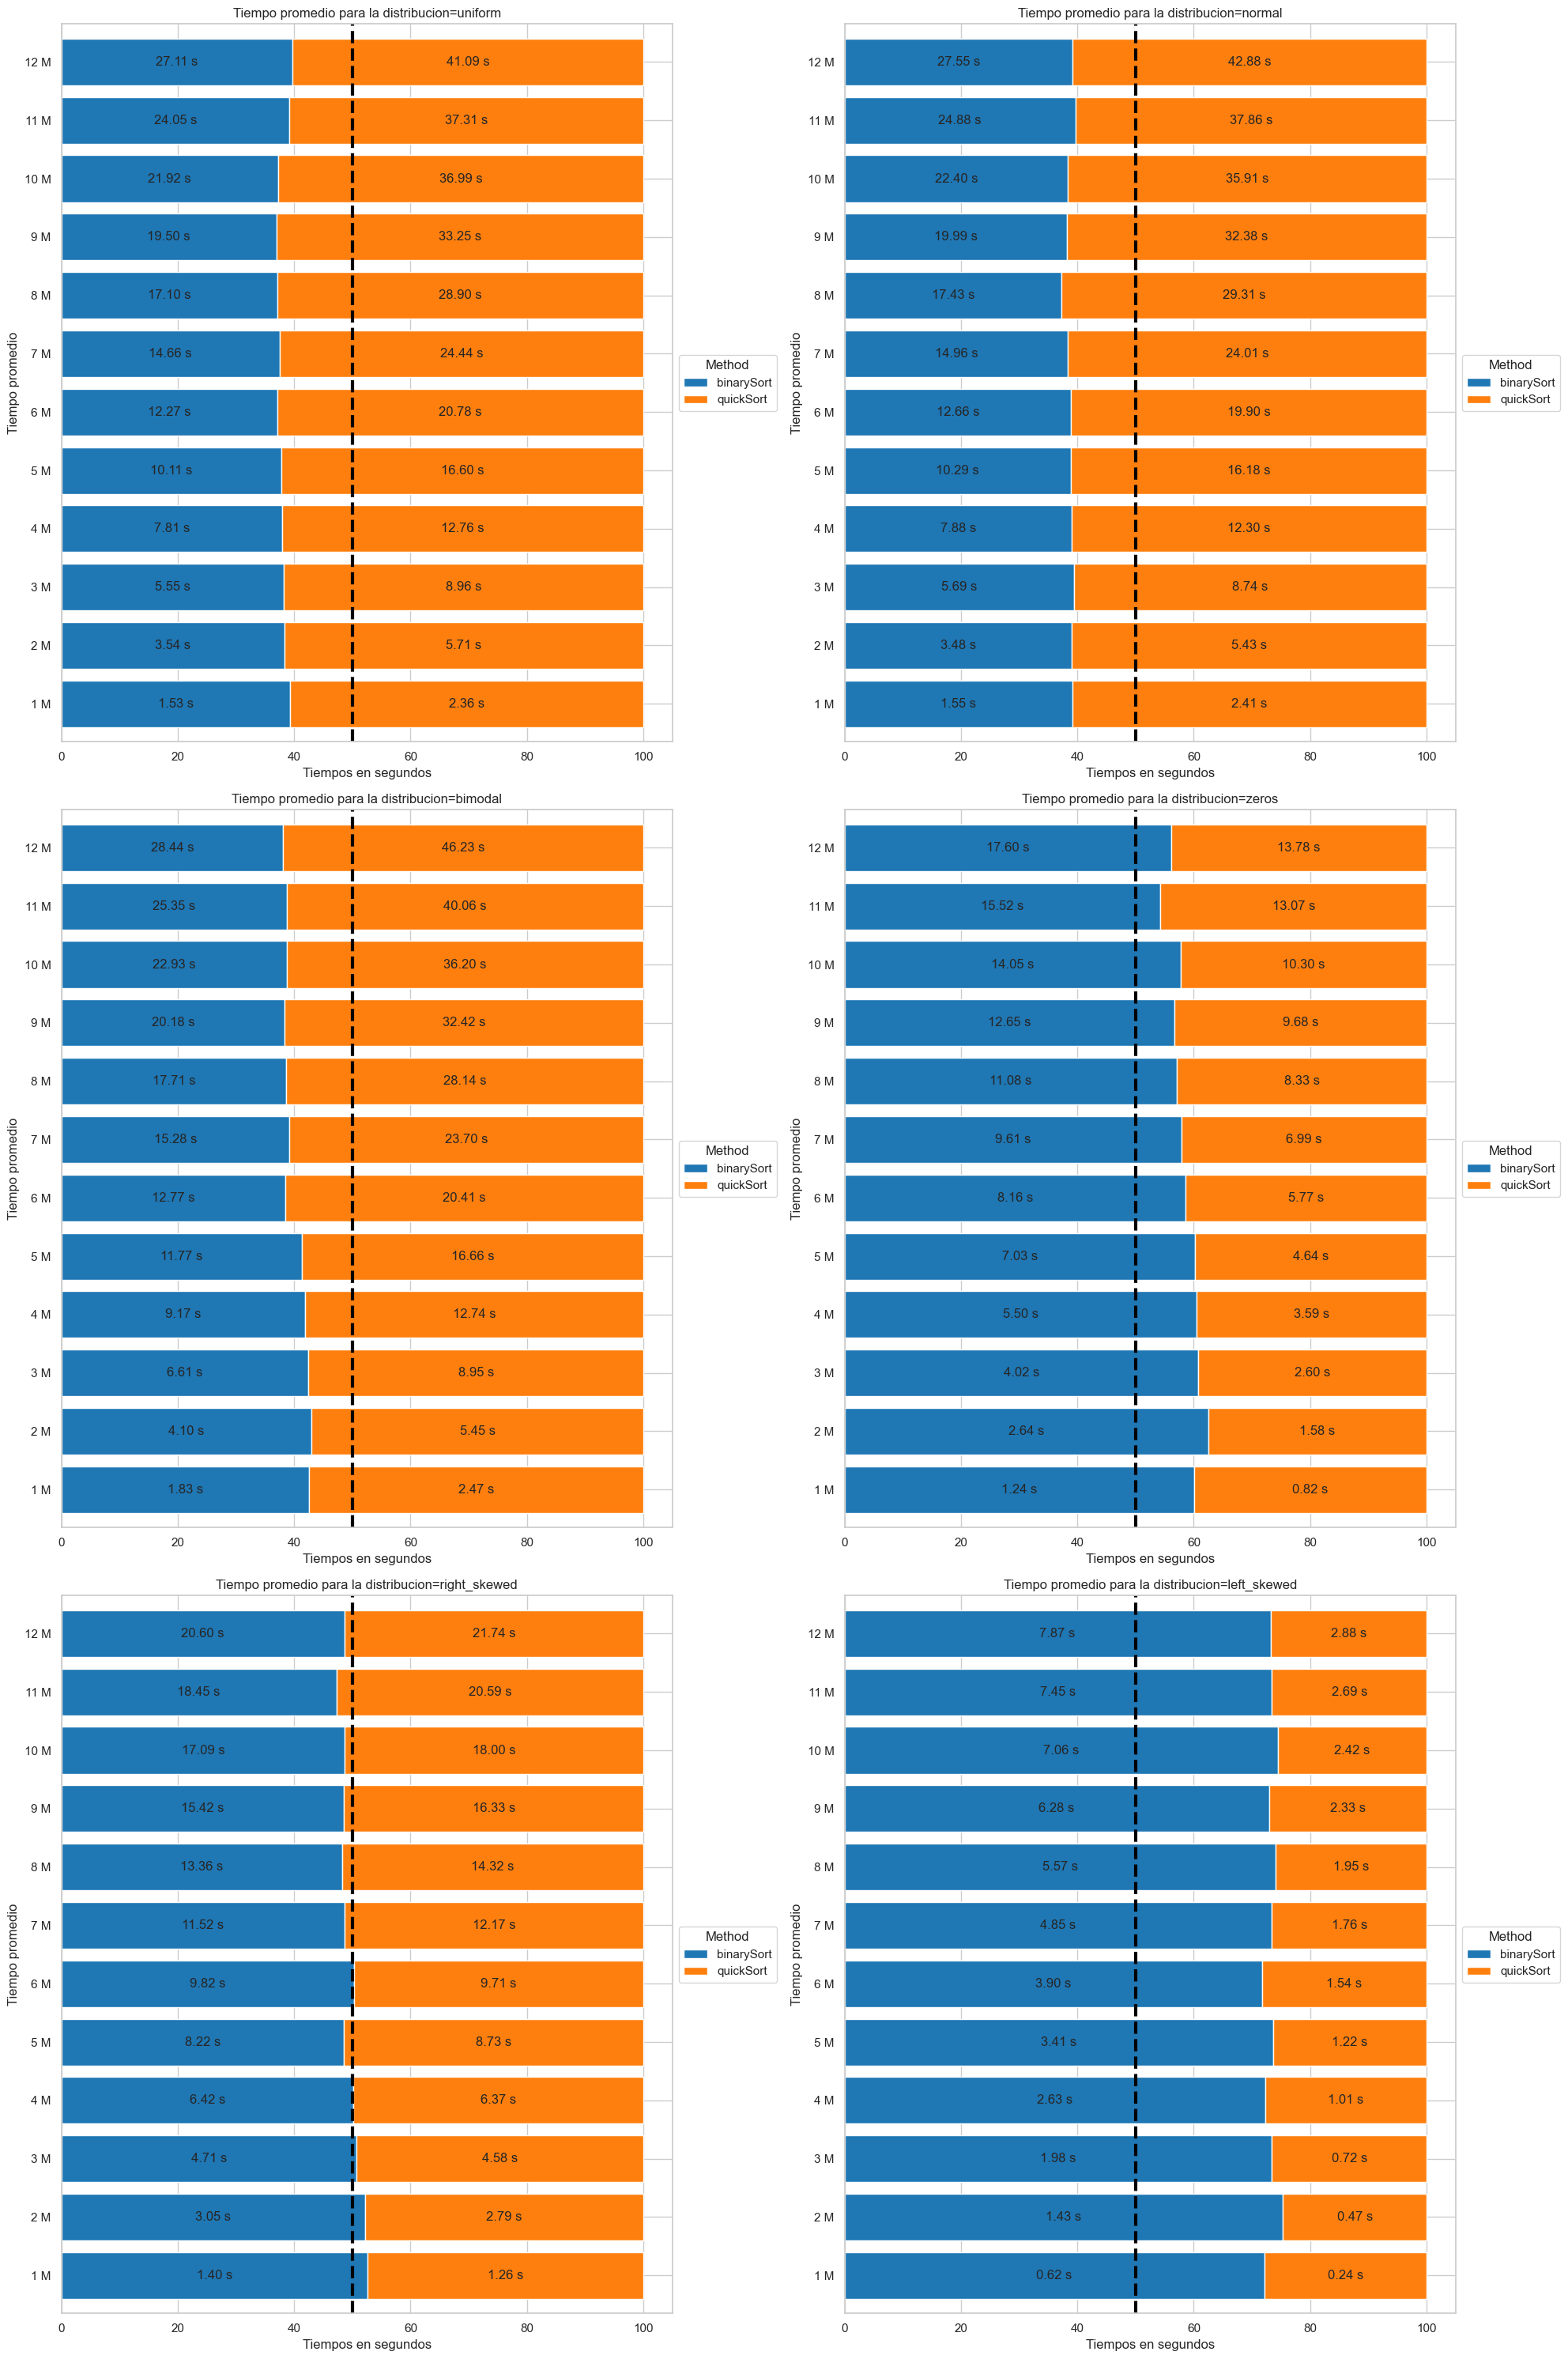

In [123]:

colors = ['#1f77b4', '#ff7f0e']
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

def millions(x, pos):
    return f"{x+1} M"



for i, dissss in enumerate(['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']):
    row = i // 2
    col = i % 2
    df_filtered = df[df['distribution'] == dissss]
    

    df_filtered = df_filtered[df_filtered['method'].isin(['binarySort', 'quickSort'])]
    
    df_pivot = df_filtered.pivot_table(index='size', columns='method', values='time', aggfunc='mean')

    df_pivot_normalized = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

    df_pivot_normalized.plot(kind='barh', color=colors, ax=axes[row, col], stacked=True, width=0.8)

    axes[row, col].set_ylabel('Tiempo promedio')
    axes[row, col].set_xlabel('Tiempos en segundos')
    axes[row, col].set_title(f'Tiempo promedio para la distribucion={dissss}')
    axes[row, col].legend(title='Method', loc='center left', bbox_to_anchor=(1, 0.5))


    for container, original_values in zip(axes[row, col].containers, df_pivot.values.T):
        labels = [f'{h:.2f} s' if h > 0 else '' for h in original_values]
        axes[row, col].bar_label(container, labels=labels, label_type='center')


    axes[row, col].axvline(x=50, color='black', linestyle='--', linewidth=3)


    axes[row, col].yaxis.set_major_formatter(millions)

plt.tight_layout()
plt.show()


## Boxplot

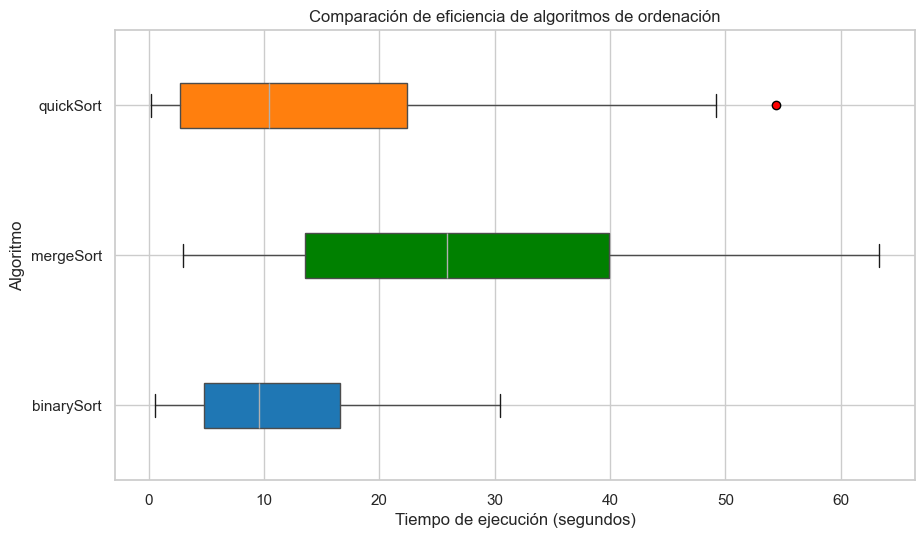

In [124]:

colors = ['#1f77b4', 'green', '#ff7f0e']

fig, ax = plt.subplots(figsize=(10, 6))

boxes = df.boxplot(column='time', by='method', ax=ax, vert=False, patch_artist=True)

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

for flier in ax.findobj(plt.Line2D):
    flier.set_markerfacecolor('red')
    flier.set_markeredgecolor('black')

ax.set_xlabel('Tiempo de ejecución (segundos)')
ax.set_ylabel('Algoritmo')
ax.set_title('Comparación de eficiencia de algoritmos de ordenación')

plt.suptitle("")

plt.show()



<p>El gráfico de boxplot compara la eficiencia de tres algoritmos de ordenación: <strong>quickSort</strong>, <strong>mergeSort</strong> y <strong>binarySort</strong>. En este gráfico, se representa la distribución de los tiempos de ejecución (en segundos) de cada algoritmo. A continuación se detalla la interpretación de cada uno:</p>

<h3>quickSort</h3>
<ul>
    <li>El rango intercuartílico (IQR), representado por la caja de color naranja, muestra la dispersión de los tiempos de ejecución. El IQR de quickSort es relativamente amplio, indicando una variabilidad significativa en su rendimiento.</li>
    <li>El valor medio (la línea dentro de la caja) está cercano a los 20 segundos, lo que indica que quickSort tiende a ser más rápido que mergeSort pero no tan eficiente como binarySort.</li>
    <li>Hay un valor atípico (outlier) en la parte superior derecha (punto rojo), lo que indica que en algunas pruebas, quickSort tuvo un rendimiento significativamente peor, alcanzando tiempos de ejecución cercanos a los 60 segundos.</li>
</ul>

<h3>mergeSort</h3>
<ul>
    <li>El IQR para mergeSort (caja verde) es el más grande de los tres algoritmos, lo que sugiere una alta variabilidad en los tiempos de ejecución. Esto significa que mergeSort puede ser inconsistente en su rendimiento.</li>
    <li>La mediana del tiempo de ejecución está alrededor de los 30 segundos, lo que lo hace el más lento en comparación con los otros dos algoritmos.</li>
    <li>mergeSort no presenta valores atípicos, lo que indica que, aunque lento, su rendimiento es más predecible y sin grandes desviaciones extremas.</li>
</ul>

<h3>binarySort</h3>
<ul>
    <li>El IQR de binarySort (caja azul) es el más pequeño de los tres, lo que indica una menor variabilidad en los tiempos de ejecución. Esto sugiere que binarySort es el algoritmo más consistente y confiable en términos de rendimiento.</li>
    <li>La mediana del tiempo de ejecución está por debajo de los 10 segundos, lo que lo posiciona como el algoritmo más rápido y eficiente entre los tres.</li>
    <li>binarySort también tiene un rango total pequeño, lo que indica que incluso en los peores casos, binarySort sigue siendo más rápido que los otros dos algoritmos en sus mejores casos.</li>
</ul>



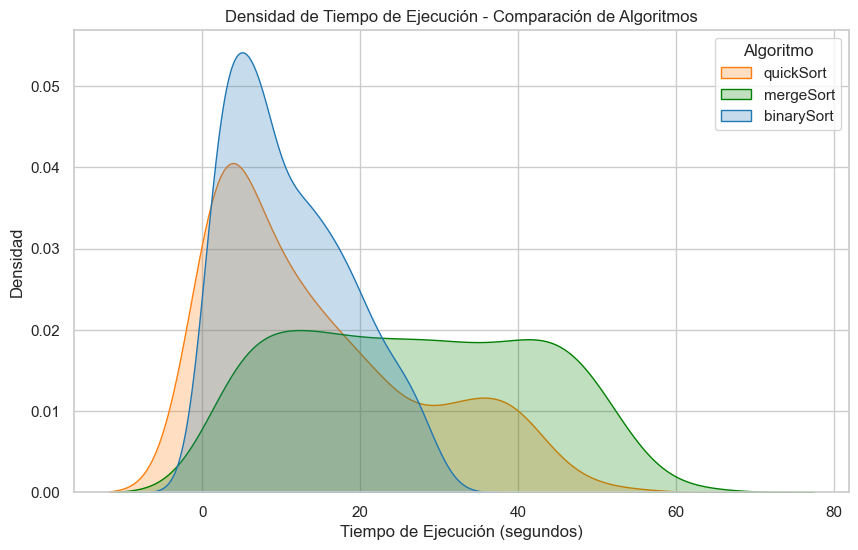

In [125]:

colors = ['#ff7f0e', 'green', '#1f77b4']
df_cleaned = df[['method', 'time']].dropna()
df_cleaned['time'] = pd.to_numeric(df_cleaned['time'], errors='coerce')
df_cleaned = df_cleaned.dropna()


methods = df_cleaned['method'].unique()


plt.figure(figsize=(10, 6))

for method, color in zip(methods, colors):
    method_data = df_cleaned[df_cleaned['method'] == method]['time']
    sns.kdeplot(method_data, color=color, fill=True, label=method)

# Ajustes de la gráfica
plt.title('Densidad de Tiempo de Ejecución - Comparación de Algoritmos')
plt.xlabel('Tiempo de Ejecución (segundos)')
plt.ylabel('Densidad')
plt.legend(title='Algoritmo')

# Mostrar la gráfica
plt.show()


<p>El gráfico de densidad refuerza la nocion de binarySort como el algoritmo más eficiente y consistente, con la mayoría de sus tiempos de ejecución concentrados en torno a un valor bajo (~10 segundos). quickSort, aunque rápido en muchos casos, muestra una mayor variabilidad y una distribución más extendida, lo que sugiere que su rendimiento es menos predecible. mergeSort es claramente el menos eficiente, con una distribución que se desplaza hacia tiempos de ejecución más largos, reflejando su menor rendimiento en comparación con los otros dos algoritmos. Estos resultados destacan a binarySort como la mejor opción en términos de velocidad y confiabilidad, especialmente en escenarios donde la eficiencia es crítica.</p>







